# Testing OE-retrieval of parameters on Round-Robin data set

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import multiprocessing as mp
import pandas as pd
from roundrobin import validate_res

## Calculated snow depth compared to in-situ data:
### Year 2015:

In [33]:
year = 2015
month_day = (3,[19,24,25,26,27,29,30],4,[1,3])

pool = mp.Pool(processes=4) # Allow 4 processes running at the same time
    
results_tot = {}
i=0
for month in month_day[::2]:
    i=i+1
    results = [pool.apply_async(
            validate_res,args=('./RRDP_v2.0/NERSC_OIB/QSCAT-vs-SMAP-vs-SMOS-vs-ASCAT-vs-AMSR2-vs-ERA-vs-NERSC-OIB-'+ 
                               str(year)+ str(month).zfill(2) + str(day).zfill(2) +'.text',)) for day in month_day[2*i-1]]
    output = [p.get() for p in results] # Results are not sorted by date
    results_tot[i-1] = pd.concat(output)
# Combine results in a dataframe:
results_tot = pd.concat(results_tot)

#sd_std_meas_tot = results_tot['sd_std_meas'] 
#sd_S_calc_tot = results_tot['sd_std']
#sd_init_tot = results_tot['sd_sim']
#P1_tot = results_tot['']

# Compute differences in snow depth
diff_sd = np.asarray(results_tot['sd_meas'])-np.asarray(results_tot['sd'])

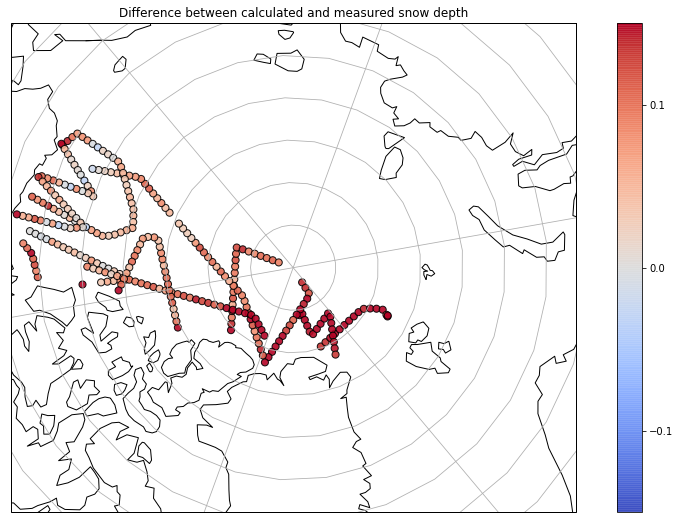

In [34]:
#%% Plot differencies on map
fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_longitude=-40, central_latitude=90))
ax.set_title('Difference between calculated and measured snow depth')
ax.coastlines()
ax.gridlines()
ax.set_extent([-130, -10, 70, 110])
markersize = 50
cax = ax.scatter(results_tot['lon'],results_tot['lat'],s=markersize,c=diff_sd,cmap=cm.coolwarm,vmin=-0.15,vmax=0.15,alpha = 0.9,edgecolor='k',transform=ccrs.Geodetic())
cbar = fig.colorbar(cax,ticks=np.arange(-0.2,0.2,0.1),orientation='vertical')
plt.show()

## Differences as scatter plot:

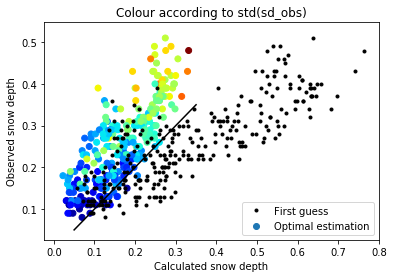

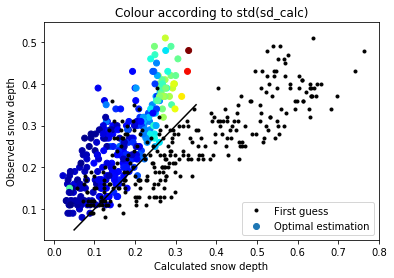

In [35]:
plt.figure()
plt.scatter(results_tot['sd'],results_tot['sd_meas'],c=results_tot['sd_std_meas'].ravel(),cmap=cm.jet,label='Optimal estimation')
plt.plot(results_tot['sd_sim'],results_tot['sd_meas'],'.k',label='First guess')
plt.xlabel('Calculated snow depth')
plt.ylabel('Observed snow depth')
plt.plot([0.05, 0.35], [0.05, 0.35],'k-')
plt.legend()
plt.title('Colour according to std(sd_obs)')
plt.show()

plt.figure()
plt.scatter(results_tot['sd'],results_tot['sd_meas'],c=results_tot['sd_std'].ravel(),cmap=cm.jet,label='Optimal estimation')
plt.plot(results_tot['sd_sim'],results_tot['sd_meas'],'.k',label='First guess')
plt.xlabel('Calculated snow depth')
plt.ylabel('Observed snow depth')
plt.plot([0.05, 0.35], [0.05, 0.35],'k-')
plt.legend()
plt.title('Colour according to std(sd_calc)')
plt.show()

## Histogram of snow depth distributions

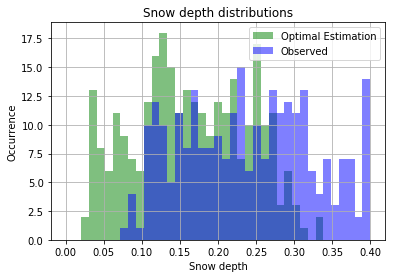

In [42]:
plt.figure()
bins = np.linspace(0,0.4,40)
plt.hist(results_tot['sd'],bins,facecolor='green',alpha=0.5,label='Optimal Estimation')
plt.hist(results_tot['sd_meas'],bins,facecolor='blue',alpha=0.5,label='Observed')
plt.xlabel('Snow depth')
plt.ylabel('Occurrence')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Snow depth distributions')
plt.show()

## Differences in surface temperature vs modelled 2m air temperatures

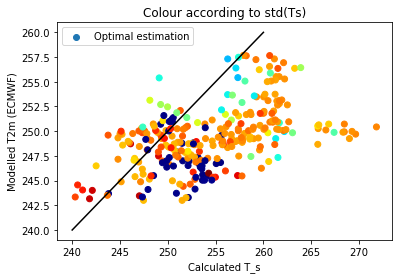

In [36]:
plt.figure()
plt.scatter(results_tot['Ts'],results_tot['T2m'],c=results_tot['Ts_std'].ravel(),cmap=cm.jet,label='Optimal estimation')
plt.xlabel('Calculated T_s')
plt.ylabel('Modelled T2m (ECMWF)')
plt.plot([240, 260], [240, 260],'k-')
plt.legend()
plt.title('Colour according to std(Ts)')
plt.show()